## Final Project Submission

Please fill out:
* Student name: JOYCE MUTHONI MUTHIKE
* Student pace: PART TIME 
* Scheduled project review date/time: 16/04/2023
* Instructor name: EVERLYNE ASIKO
* Blog post URL:


# PHASE 1 PROJECT

# Project Overview
This project aims to analyze box office data to provide actionable insights for Microsoft's new movie studio on what types of films to create and how to maximize revenue.

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they do not know anything about creating movies. This project seeks to explore the types of films that are currently doing the best at the box office and translate these findings into actionable insights that the head of Microsoft's new movie studio will use to help decide what type of films to create and how to maximize revenue.


# The Data
The findings of this project will be derived from the analysis of the below datasets:


   'bom.movie_gross.csv.gz'
   
   'tn.movie_budgets.csv.gz'
   
   'tmdb.movies.csv.gz'
   
   'rt.reviews.tsv.gz'
   
   'rt.movie_info.tsv.gz'
   
   'im.db'
   
# Project Objectives

1. Identifying the most successful studios based on domestic and/or international gross.
2. Identifying which genres tend to have higher domestic and/or international gross.
3. Identifying the correlation between film production cost and it's box office success.
4. Investigating the relationship between ratings & reviews and box office success.

   
# Getting started
   

In [1]:
# importing libraries using relevant alias
import pandas as pd
import csv 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
# Loading 'bom.movie_gross.csv.gz' as a DataFrame
bom_df = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')
# Displaying the first five rows of bom_df
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Loading 'tn_movie_budgets_df' as a dataframe
budgets_df = pd.read_csv('ZippedData/tn.movie_budgets.csv.gz', index_col=0)
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# Loading 'tmdb.movies.csv.gz' as a dataframe
movies_df = pd.read_csv('ZippedData/tmdb.movies.csv.gz', index_col=0)
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Loading 'rt.reviews.tsv.gz' as a dataframe
rt_reviews_df = pd.read_csv('ZippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape', index_col=0)
rt_reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
#Loading 'rt.movie_info.tsv.gz' as a dataframe
movie_info_df = pd.read_csv('ZippedData/rt.movie_info.tsv.gz', delimiter='\t', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
# Viewing the list of tables on the im.db database

# Connecting to the database
conn = sqlite3.connect('zippedData/im.db/im.db')

# Creating a cursor object to execute SQL commands
cur = conn.cursor()

# Execute the query for finding table names
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

# Exploring the data
**Lets explore bom_df data...**

In [8]:
# To get a concise summary of the bom_df data
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
# to obtain a tuple representing the number of rows and number of columns.
bom_df.shape

(3387, 5)

In [10]:
# to get column names
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [11]:
# Checking for the missing values in each column
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
#counting duplicated data
bom_df.duplicated().sum() 

0

In [13]:
# Discovered incosistencies with the data
"""There are 3387 entries, but not all columns have the same number of non-null values.This means that there are some missing values in the dataset to be handled.
The "foreign_gross" column has an object data type instead of a numeric data type. This will need to be converted before the final analysis.
The "year" column only contains integers, which may make it difficult to analyze trends over time by quarter or monthly. There is need to create a new column with a more specific date format to analyze temporal trends closely.
"""

'There are 3387 entries, but not all columns have the same number of non-null values.This means that there are some missing values in the dataset to be handled.\nThe "foreign_gross" column has an object data type instead of a numeric data type. This will need to be converted before the final analysis.\nThe "year" column only contains integers, which may make it difficult to analyze trends over time by quarter or monthly. There is need to create a new column with a more specific date format to analyze temporal trends closely.\n'

**Lets explore budgets_df data...**

In [14]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [15]:
budgets_df.shape

(5782, 5)

In [16]:
budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [17]:
# Checking for the missing values in each column
budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
#counting duplicated data
budgets_df.duplicated().sum() 

0

In [19]:
# Discovered incosistencies with the data
"""The data types for the columns production_budget, domestic_gross, and worldwide_gross are object instead of numeric types like float or int. 
This suggests that the format of the values in these columns need to be cleaned before they can be used for analysis.
The release date should also be converted to datetime format.
"""

'The data types for the columns production_budget, domestic_gross, and worldwide_gross are object instead of numeric types like float or int. \nThis suggests that the format of the values in these columns need to be cleaned before they can be used for analysis.\nThe release date should also be converted to datetime format.\n'

**Let's explore movies_df data...**

In [20]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [21]:
movies_df.shape

(26517, 9)

In [22]:
movies_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [23]:
#Checking for the missing values in each column
movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [24]:
#counting duplicated data
movies_df.duplicated().sum() 

1020

In [25]:
# Discovered incosistencies with the data
"""There are 1020 duplicated columns in the movies_df dataset.
"""

'There are 1020 duplicated columns in the movies_df dataset.\n'

**Let's explore rt_reviews_df data...**

In [26]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [27]:
rt_reviews_df.shape

(54432, 7)

In [28]:
rt_reviews_df.columns

Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [29]:
#Checking for the sum of missing values in each column
rt_reviews_df.isna().sum()

review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [30]:
# Calculating the percentage of missing values in each column

# Calculate the fraction of missing values in each column
missing_fraction = rt_reviews_df.isna().mean()

missing_percent = 100 * missing_fraction
print(missing_percent)

review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64


In [31]:
#counting duplicated data
rt_reviews_df.duplicated().sum() 

2123

In [32]:
# Discovered incosistencies with the data
"""There are missing values in the review, rating, critic, and publisher columns.
The 'fresh' column is of type object instead of a boolean data type.
The 'top_critic' column is of type int64 instead of a boolean data type.
The 'date' column is of type object instead of a datetime data type.
There are 2123 duplicated rows
"""

"There are missing values in the review, rating, critic, and publisher columns.\nThe 'fresh' column is of type object instead of a boolean data type.\nThe 'top_critic' column is of type int64 instead of a boolean data type.\nThe 'date' column is of type object instead of a datetime data type.\nThere are 2123 duplicated rows\n"

**Let's explore movie_info_df data...**

In [33]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [34]:
movie_info_df.shape

(1560, 11)

In [35]:
movie_info_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [36]:
#Checking for the sum of missing values in each column
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [37]:
# Calculating the percentage of missing values in each column

# Calculate the fraction of missing values in each column
missing_fraction = movie_info_df.isna().mean()
missing_percent = 100 * missing_fraction
print(missing_percent)

synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64


In [38]:
movie_info_df.duplicated().sum()

4

In [39]:
#Discovered inconsistences
"""There are missing values in all columns with extreme missing values in 'currency', 'box_office' and 'studio' columns. 
The 'theater_date' and 'dvd_date' columns are of type 'object' instead of 'datetime'.
The 'box_office' column is of type 'object' instead of 'int' or 'float'.
The 'runtime' column is of type 'object' instead of 'int' or 'float'
There are 4 duplicated rows.
"""

"There are missing values in all columns with extreme missing values in 'currency', 'box_office' and 'studio' columns. \nThe 'theater_date' and 'dvd_date' columns are of type 'object' instead of 'datetime'.\nThe 'box_office' column is of type 'object' instead of 'int' or 'float'.\nThe 'runtime' column is of type 'object' instead of 'int' or 'float'\nThere are 4 duplicated rows.\n"

# Next, I did some data cleaning:
 **Cleaning the bom_df data...**

I decided to drop the foreign_gross column since  a large sum of the values were missing and may not have provided much useful information for the analysis.

I replaced the rows in domestic_gross where the domestic_gross column had missing values.

I dropped the rows in studio where the studio column had missing values.

Finally, I created a new column with a more specific date format:

In [40]:
# dropping the 'foreign_gross' column
bom_df.drop('foreign_gross', axis=1, inplace=True)

In [41]:
#rechecking the columns
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'year'], dtype='object')

In [42]:
# Calculating the median value of the 'domestic_gross' column
median = bom_df['domestic_gross'].median()

# Filling missing values with the median value
bom_df['domestic_gross'].fillna(median, inplace=True)

In [43]:
# dropping rows of the 'studio' column with missing values
bom_df.dropna(subset=['studio'], inplace=True)

In [44]:
# Rechecking for missing values in each column
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [45]:
# Creating a new column with a more specific date format
import random
from datetime import datetime, timedelta

def random_date(year):
    """
    Generate a random date for a given year.
    """
    start_date = datetime(year=year, month=1, day=1)
    end_date = datetime(year=year, month=12, day=31)
    delta = end_date - start_date
    days = random.randint(0, delta.days)
    return start_date + timedelta(days=days)

bom_df['date'] = bom_df['year'].apply(lambda x: random_date(x))
bom_df.head()

,title,studio,domestic_gross,year,date
0,Toy Story 3,BV,415000000.0,2010,2010-09-12
1,Alice in Wonderland (2010),BV,334200000.0,2010,2010-09-03
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,2010-12-24
3,Inception,WB,292600000.0,2010,2010-03-09
4,Shrek Forever After,P/DW,238700000.0,2010,2010-11-06


In [46]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3382 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3382 non-null   float64       
 3   year            3382 non-null   int64         
 4   date            3382 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 158.5+ KB


**Cleaning the budgets_df data...**

I coverted the datatypes of the production_budget, domestic_gross and worldwide_gross columns to a float and release_date column to a datetime format.

In [47]:
# Cleaning the data types
budgets_df['production_budget'] = budgets_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

# Check the data types after cleaning
budgets_df.dtypes

release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

In [48]:
#Rechecking the first five rows
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


**Cleaning the rt_reviews_df data...**

I decided to drop the missing rows in the 'rating' column because  the missing data was more than more than 20% of the total number of rows and replacing them could lead to biased data.

I also dropped missing rows in the 'review' column because I felt more than 10% was also a large number and replacing them could also lead to biased data.

I decided to fill in missing values in the 'critic' and 'publisher' column because my dataset had already been significantly reduced after dropping rows in the 'review' and 'rating' column. Also because with the percentage of missing values in these columns being 5% and below, it shows there are only a few missing values and filling in is the most viable option.

I removed all duplicated rows from the DataFrame and modified it in place.

I converted the datatpype of the 'fresh' and 'top_critic' columns into a boolean.

Finally, I converted the datatype of the date column to a datetime datatype:

In [49]:
# Dropping rows with missing values in the 'rating' column
rt_reviews_df = rt_reviews_df.dropna(subset=['rating'])

In [50]:
# Dropping rows with missing values in the 'review' column
rt_reviews_df = rt_reviews_df.dropna(subset=['review'])

In [51]:
# Filling in missing values with the string "Unknown" for 'critic' and 'publisher' column
rt_reviews_df['critic'].fillna('Unknown', inplace=True)
rt_reviews_df['publisher'].fillna('Unknown', inplace=True)

In [52]:
#Rechecking for missing values
rt_reviews_df.isna().sum()

review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [53]:
# Dropping the duplicated rows
rt_reviews_df.drop_duplicates(inplace=True)

In [54]:
# Rechecking for duplicated rows
rt_reviews_df.duplicated().sum() 

0

In [55]:
rt_reviews_df.shape

(35294, 7)

In [56]:
# Converting the'fresh' column into a boolean data type.
rt_reviews_df['fresh'] = rt_reviews_df['fresh'].map({'fresh': True, 'rotten': False})

In [57]:
# Converting the 'top_critic' column into a boolean data type.
rt_reviews_df['top_critic'] = rt_reviews_df['top_critic'].map({1 : True, 0 : False})
rt_reviews_df.sample(10)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
572,"Like its star, the movie is loud, tactless and...",1/4,False,Josh Larsen,False,"Sun Publications (Chicago, IL)","January 20, 2003"
1207,Spiritual on the one hand and street tough on ...,3.5/5,True,Cherryl Dawson,False,TheMovieChicks.com,"July 13, 2003"
850,The weirdest and rarest misfire in Lee's illus...,C-,False,Joe McGovern,True,Entertainment Weekly,"November 10, 2016"
1325,There are a few entertaining and amusing momen...,2/5,False,Michelle Kisner,False,The Movie Sleuth,"November 6, 2018"
251,Despite its emotional inaccessibility and over...,3/5,True,Cameron Meier,False,Orlando Weekly,"January 14, 2016"
1601,full review at Movies for the Masses,3.5/5,True,Joseph Proimakis,False,Movies for the Masses,"March 11, 2011"
1995,It makes for a satisfying summer moviegoing ex...,3/4,True,Kevin N. Laforest,False,Montreal Film Journal,"September 10, 2002"
1292,Frances McDormand lets loose in a terrific new...,3/5,True,Marcy Dermansky,False,About.com,"October 24, 2003"
974,Capturing the changes a man goes through as he...,3.5/4,True,Unknown,False,TV Guide,"March 9, 2009"


In [58]:
#Seeking to see 'rating' values
rt_reviews_df['rating'].unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '0/4', '2/10', '7', '3',
       'A+', 'A', '4.5/5', '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0.5/10', '5', '0',
       '2', '1/10', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5', '0.5/5',
       '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5', '8.6/10',
       '6/8', 'D-', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10', 'N',
       '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10', '5.9/10',
       '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4', '8.8/10',
       '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '3.2', '4.2',
       '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10', '3.6/5', '2/6'

In [59]:
# Converting 'date' column to datetime data type
rt_reviews_df['date'] = pd.to_datetime(rt_reviews_df['date'])

In [60]:
#Rechecking my data
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35294 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   review      35294 non-null  object        
 1   rating      35294 non-null  object        
 2   fresh       35294 non-null  bool          
 3   critic      35294 non-null  object        
 4   top_critic  35294 non-null  bool          
 5   publisher   35294 non-null  object        
 6   date        35294 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), object(4)
memory usage: 1.7+ MB


**Cleaning the movie_info_df data...**

With missing data being more than 60% of the total number of rows for the 'currency', 'box_office' and 'studio' columns, I decided to drop these three entire columns entirely.

With missing data being more than 20% of the total number of rows in the 'writer', 'theater_date' and 'dvd_date ' columns, I decided to drop the rows with missing data in these respective columns.

For missing data in the rest of the columns that was below 20% of the total number of rows, I decided to fill in the missing values.

I also converted datatypes of 'runtime' into a float and 'theater_date' and 'dvd_date' columns' datatypes into the datetime format.

Finally, I removed duplicated rows.

In [61]:
#Dropping  'currency', 'box_office' and 'studio' columns
movie_info_df.drop(['currency', 'box_office', 'studio'], axis=1, inplace=True)

In [62]:
#Rechecking columns
movie_info_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'runtime'],
      dtype='object')

In [63]:
#Dropping rows with missing data in the 'writer','theater_date' and 'dvd_date' columns
movie_info_df.dropna(subset=['writer', 'theater_date', 'dvd_date'], inplace=True)

In [64]:
# Filling in missing values with the string "Unknown" for  'synopsis'and 'director' columns
movie_info_df['synopsis'].fillna('Unknown', inplace=True)
movie_info_df['director'].fillna('Unknown', inplace=True)

In [65]:
#Using forward fill (ffill) method to fill in missing values in 'runtime' column
movie_info_df['runtime'].fillna(method='ffill', inplace=True)

In [66]:
#Seeking to see 'runtime' values
movie_info_df['rating'].unique()

array(['R', 'PG', 'PG-13', 'G', 'NR', 'NC17'], dtype=object)

In [67]:
# Using mode to fill in missing values in the 'rating' column

mode_rating = movie_info_df['rating'].mode()[0] # getting the mode of the 'rating' column
movie_info_df['rating'].fillna(mode_rating, inplace=True) # filling in missing values with the mode

In [68]:
# Using mode to fill in missing values in the 'rating' column

genre_mode = movie_info_df['genre'].mode()[0] # Calculating mode value of 'genre' column
movie_info_df['genre'].fillna(genre_mode, inplace=True) # Filling in missing values with the mode value

In [69]:
#seeking to see if 'runtime' values are normally distributed
movie_info_df['runtime'].unique()

array(['104 minutes', '108 minutes', '116 minutes', '128 minutes',
       '95 minutes', '82 minutes', '123 minutes', '117 minutes',
       '97 minutes', '106 minutes', '98 minutes', '127 minutes',
       '96 minutes', '90 minutes', '110 minutes', '91 minutes',
       '142 minutes', '119 minutes', '86 minutes', '93 minutes',
       '111 minutes', '89 minutes', '115 minutes', '107 minutes',
       '165 minutes', '99 minutes', '113 minutes', '135 minutes',
       '92 minutes', '102 minutes', '101 minutes', '114 minutes',
       '109 minutes', '124 minutes', '100 minutes', '134 minutes',
       '87 minutes', '94 minutes', '188 minutes', '126 minutes',
       '63 minutes', '132 minutes', '137 minutes', '79 minutes',
       '65 minutes', '156 minutes', '15 minutes', '85 minutes',
       '120 minutes', '80 minutes', '118 minutes', '88 minutes',
       '81 minutes', '143 minutes', '133 minutes', '129 minutes',
       '52 minutes', '105 minutes', '83 minutes', '103 minutes',
       '121 minutes

In [70]:
# Converting 'runtime' values into a float data type
movie_info_df['runtime'] = movie_info_df['runtime'].str.replace(' minutes', '').astype(float)

In [71]:
# It's a normal distribution so we use median to fill in missing values

# Calculating the median value of the runtime column
runtime_median = movie_info_df["runtime"].median()

# Filling in missing values with the median value
movie_info_df["runtime"].fillna(runtime_median, inplace=True)

In [72]:
#Converting 'theater_date' and 'dvd_date' columns' datatypes into  datetime
movie_info_df['theater_date'] = pd.to_datetime(movie_info_df['theater_date'])
movie_info_df['dvd_date'] = pd.to_datetime(movie_info_df['dvd_date'])

In [73]:
# Removing duplicated rows
movie_info_df = movie_info_df.drop_duplicates()

In [74]:
# Rechecking for duplicates
movie_info_df.duplicated().sum()

0

In [75]:
# Rechecking for missing values
movie_info_df.isna().sum()

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [76]:
#Rechecking the shape
movie_info_df.shape

(937, 8)

In [77]:
# Rechecking the data
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   synopsis      937 non-null    object        
 1   rating        937 non-null    object        
 2   genre         937 non-null    object        
 3   director      937 non-null    object        
 4   writer        937 non-null    object        
 5   theater_date  937 non-null    datetime64[ns]
 6   dvd_date      937 non-null    datetime64[ns]
 7   runtime       937 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 65.9+ KB


# Now, Onto some more specific Data Analysis and Visualization:
**1. IDENTIFYING THE MOST SUCCESSFUL STUDIOS BASED ON DOMESTIC AND/OR INTERNATIONAL GROSS.**

In [78]:
# Merging the bom_df and budgets_df datasets
merged_df_gross = pd.merge(bom_df, budgets_df, left_on='title', right_on='movie', how='inner')
merged_df_gross.head()

,title,studio,domestic_gross_x,year,date,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,2010,2010-09-12,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,2010,2010-03-09,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,2010,2010-11-06,2010-05-21,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,2010-01-03,2010-06-30,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,2010,2010-01-01,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08


In [79]:
# Grouping by studio and calculating total domestic and international gross
studio_gross_df = merged_df_gross.groupby('studio').agg({'domestic_gross_x': 'sum', 'worldwide_gross': 'sum'})

# Renaming columns
studio_gross_df = studio_gross_df.rename(columns={'domestic_gross_x': 'domestic_gross', 'worldwide_gross': 'international_gross'})

# Calculating total gross
studio_gross_df['total_gross'] = studio_gross_df['domestic_gross'] + studio_gross_df['international_gross']

# Sort by total gross in descending order
studio_gross_df = studio_gross_df.sort_values(by='total_gross', ascending=False)

# Displaying the top 10 studios based on total gross
top_studios = studio_gross_df.head(10)
top_studios

,domestic_gross,international_gross,total_gross
studio,,,
BV,1.292690e+10,3.328602e+10,4.621292e+10
Uni.,1.077074e+10,2.732929e+10,3.810003e+10
Fox,9.306400e+09,2.679581e+10,3.610221e+10
WB,9.191900e+09,2.219381e+10,3.138571e+10
Sony,7.146000e+09,1.760181e+10,2.474781e+10
Par.,6.039100e+09,1.443821e+10,2.047731e+10
WB (NL),3.417700e+09,8.540864e+09,1.195856e+10
LGF,3.332373e+09,6.983389e+09,1.031576e+10
P/DW,1.682900e+09,5.078028e+09,6.760928e+09


# Visualization of studio to gross analysis
I created a histogram to give a visual representation of the distribution of total grosses across all studios and a bar chart to show the total gross revenue for each of the top 10 movie studios.

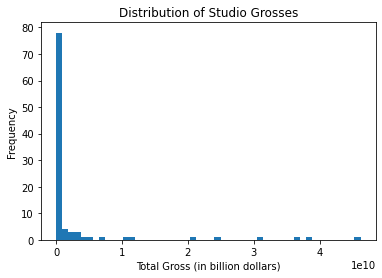

In [80]:
# Plotting a histogram to show the distribution of studio grosses
plt.hist(studio_gross_df['total_gross'], bins=50)

# Setting the title and axis labels
plt.title('Distribution of Studio Grosses')
plt.xlabel('Total Gross (in billion dollars)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

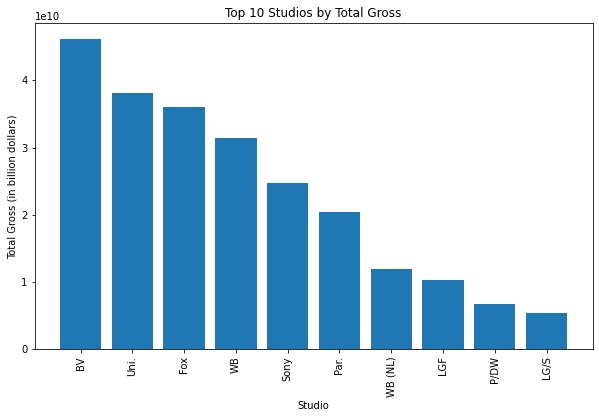

In [81]:
# Creating a bar chart of the top 10 studios based on total gross
plt.figure(figsize=(10, 6))
plt.bar(top_studios.index, top_studios['total_gross'])

# Setting the title and axis labels
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross (in billion dollars)')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Observation**

In [82]:
"""
The histogram indicates that over 70 studios have a total gross between 0 and 0.5 billion dollars, with a few outliers (below 10) having a total gross of over 4 billion dollars.
This suggests the movie industry is highly competitive, with most studios earning relatively modest profits.
This also suggests that a few major studios dominate the film industry and earn the majority of its profits.
On the other hand, the bar graph shows the top 10 studios that are the most successful studios earning  much higher profits than the average studio.
"""

'\nThe histogram indicates that over 70 studios have a total gross between 0 and 0.5 billion dollars, with a few outliers (below 10) having a total gross of over 4 billion dollars.\nThis suggests the movie industry is highly competitive, with most studios earning relatively modest profits.\nThis also suggests that a few major studios dominate the film industry and earn the majority of its profits.\nOn the other hand, the bar graph shows the top 10 studios that are the most successful studios earning  much higher profits than the average studio.\n'

**2. ANALYZING THE DISTRIBUTION OF MOVIES BY GENRES TO IDENTIFY WHICH GENRES TEND TO HAVE HIGHER DOMESTIC AND/OR INTERNATIONAL GROSS**

In [83]:
# Merging the budgets_df and movie_info_df datasets
merged_df_genre = pd.merge(budgets_df, movie_info_df, left_on='release_date', right_on='theater_date', how='inner')
merged_df_genre.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,2012-03-09,John Carter,275000000.0,73058679.0,282778100.0,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,2012-07-17,107.0
1,2012-03-09,John Carter,275000000.0,73058679.0,282778100.0,From filmmaker Andrew Stanton comes John Carte...,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,Mark Atkins|Mark Andrews|Michael Chabon|Andrew...,2012-03-09,2012-06-05,118.0
2,2012-03-09,A Thousand Words,40000000.0,18450127.0,20790486.0,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,2012-07-17,107.0
3,2012-03-09,A Thousand Words,40000000.0,18450127.0,20790486.0,From filmmaker Andrew Stanton comes John Carte...,PG-13,Action and Adventure|Horror|Kids and Family|Sc...,Andrew Stanton|Mark Atkins,Mark Atkins|Mark Andrews|Michael Chabon|Andrew...,2012-03-09,2012-06-05,118.0
4,2012-03-09,Silent House,2000000.0,12739737.0,16610760.0,Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,2012-03-09,2012-07-17,107.0


In [84]:
# Grouping by genre and calculating the total domestic and international gross
genre_gross_df = merged_df_genre.groupby('genre')[['domestic_gross', 'worldwide_gross']].sum()

#Renaming the column worldwide_gross
genre_gross_df = genre_gross_df.rename(columns={'worldwide_gross': 'international_gross'})

# Calculating total gross
genre_gross_df['total_gross'] = genre_gross_df['domestic_gross'] + genre_gross_df['international_gross']

# Sort by total gross in descending order
genre_gross_df = genre_gross_df.sort_values(by='total_gross', ascending=False)

# Displaying the top 10 genres based on total gross
top_genres = genre_gross_df.head(10)
top_genres

,domestic_gross,international_gross,total_gross
genre,,,
Drama,1.002752e+10,2.148240e+10,3.150992e+10
Comedy,6.669892e+09,1.327079e+10,1.994068e+10
Comedy|Drama,4.661394e+09,1.108836e+10,1.574975e+10
Drama|Mystery and Suspense,3.211986e+09,7.151646e+09,1.036363e+10
Comedy|Romance,2.758701e+09,6.128427e+09,8.887128e+09
Drama|Romance,2.630530e+09,5.509914e+09,8.140444e+09
Action and Adventure|Science Fiction and Fantasy,1.813010e+09,4.221850e+09,6.034860e+09
Action and Adventure|Drama|Mystery and Suspense,1.777634e+09,3.838749e+09,5.616382e+09
Art House and International|Drama,2.095860e+09,3.484392e+09,5.580252e+09


# Visualization of genre to gross analysis
I used a bar graph to display the total gross for each genre.

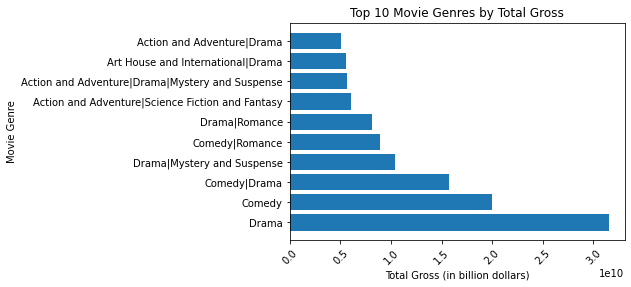

In [85]:
# Creating a bar chart to visualize the distribution of total gross revenue across different genres
plt.barh(top_genres.index, top_genres['total_gross'])
plt.title('Top 10 Movie Genres by Total Gross')
plt.xlabel('Total Gross (in billion dollars)')
plt.ylabel('Movie Genre')
plt.xticks(rotation=45)
plt.show()

**Observation**

In [86]:
"""
Based on the bar chart of the top 10 movie genres by total gross, the highest grossing movie genres are drama, comedy, comedy|Drama and Drama|Mystery|Suspense grossing at over 1 billion dollars.
The other genres gross relatively low at below 1 billion dollars.
"""

'\nBased on the bar chart of the top 10 movie genres by total gross, the highest grossing movie genres are drama, comedy, comedy|Drama and Drama|Mystery|Suspense grossing at over 1 billion dollars.\nThe other genres gross relatively low at below 1 billion dollars.\n'

**3. IDENTIFYING THE CORRELATION BETWEEN FILM PRODUCTION COST AND IT'S BOX OFFICE SUCCESS**

In [87]:
# Using the previously merged bom_df and budgets_df dataframes as merged_df_gross
merged_df_gross = pd.merge(bom_df, budgets_df, left_on='title', right_on='movie', how='inner')

#Renaming the worldwide_gross column
merged_df_gross = merged_df_gross.rename(columns={'domestic_gross_x': 'domestic_gross', 'worldwide_gross': 'international_gross'})
merged_df_gross.head()

,title,studio,domestic_gross,year,date,release_date,movie,production_budget,domestic_gross_y,international_gross
0,Toy Story 3,BV,415000000.0,2010,2010-09-12,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,2010,2010-03-09,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,2010,2010-11-06,2010-05-21,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,2010-01-03,2010-06-30,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,2010,2010-01-01,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08


In [88]:
# Summing up the domestic and international gross to get the total gross
merged_df_gross['total_gross'] = merged_df_gross['domestic_gross'] + merged_df_gross['international_gross']

# Grouping by movie and calculating total production cost and total gross
p_cost_gross_df = merged_df_gross.groupby('movie').agg(
                    {'production_budget': 'sum', 
                     'total_gross': 'sum'}
                  ).reset_index()
# Sort by production_budget in descending order
p_cost_gross_df = p_cost_gross_df.sort_values(by='production_budget', ascending=False)
p_cost_gross_df.head(10)

,movie,production_budget,total_gross
671,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.286764e+09
94,Avengers: Age of Ultron,330600000.0,1.862014e+09
721,Robin Hood,309000000.0,6.178064e+08
469,Justice League,300000000.0,8.849452e+08
95,Avengers: Infinity War,300000000.0,2.726934e+09
800,Spectre,300000000.0,1.079721e+09
453,John Carter,275000000.0,3.558781e+08
903,The Dark Knight Rises,275000000.0,1.532539e+09
790,Solo: A Star Wars Story,275000000.0,6.069513e+08
1012,The Lone Ranger,275000000.0,3.493021e+08


# Visualization of production cost to its total gross
I used a line plot  and scatter plot to visualize the correlation between production_budget and total gross.

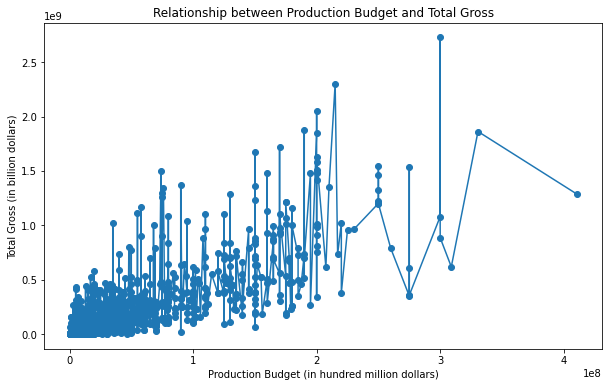

In [89]:
# Creating a new figure
plt.figure(figsize=(10, 6))

# Plotting the production budget against total gross as a line plot
plt.plot(p_cost_gross_df['production_budget'], p_cost_gross_df['total_gross'], '-o')

# Setting the x and y axis labels and title
plt.xlabel('Production Budget (in hundred million dollars)')
plt.ylabel('Total Gross (in billion dollars)')
plt.title('Relationship between Production Budget and Total Gross')

# Show the plot
plt.show()

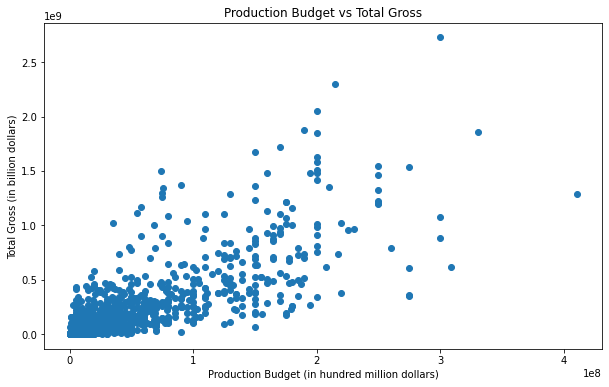

In [90]:
# Creating a new figure
plt.figure(figsize=(10, 6))

# Plotting a scatter plot with production budget on the x-axis and total gross on the y-axis
plt.scatter(p_cost_gross_df['production_budget'], p_cost_gross_df['total_gross'])

# Add axis labels and title
plt.xlabel('Production Budget (in hundred million dollars)')
plt.ylabel('Total Gross (in billion dollars)')
plt.title('Production Budget vs Total Gross')

# Show the plot
plt.show()

In [91]:
# Calculating correlation between production budget and total gross
corr_value = p_cost_gross_df['production_budget'].corr(p_cost_gross_df['total_gross'])
print('Correlation between production budget and total gross:', corr_value)

Correlation between production budget and total gross: 0.7689176866128671


**Observation**

In [92]:
"""
As per the sactter plot, line plot and the correlation numerical value, there is a positive correlation between the production budget and the total gross. 
This indicates that movies with higher production budgets tend to have higher total gross revenues, meaning more box office success.
However, there are some outliers where movies with relatively lower production budgets have higher total gross revenues and those that have higher  production budgets with much lower gross revenues.
"""

'\nAs per the sactter plot, line plot and the correlation numerical value, there is a positive correlation between the production budget and the total gross. \nThis indicates that movies with higher production budgets tend to have higher total gross revenues, meaning more box office success.\nHowever, there are some outliers where movies with relatively lower production budgets have higher total gross revenues and those that have higher  production budgets with much lower gross revenues.\n'

**4. INVESTIGATING THE RELATIONSHIP BETWEEN RATINGS & REVIEWS AND BOX OFFICE SUCCESS.**

I used a scatter plot to investigate the relationship between box office gross and IMDB rating.

In [93]:
# merging movies_df and bom_df dataframes on the movie title.
merged_df = pd.merge(movies_df, bom_df, on='title')
merged_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,year,date
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,2010,2010-11-14
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,2010,2010-01-01
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,2010,2010-03-09
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,2010,2010-09-12
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,2010,2010-03-27


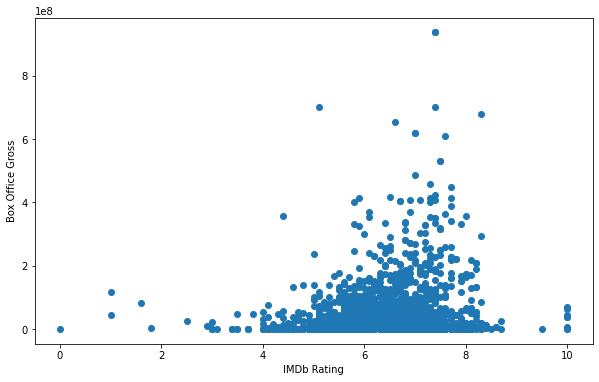

In [94]:
# Creating a new figure
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['vote_average'], merged_df['domestic_gross'])
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office Gross')
plt.show()

In [95]:
merged_df['vote_average'].corr(merged_df['domestic_gross'])

0.13594678897529894

**Observation**

In [96]:
""" There is a weak positive correlation between IMDb ratings and box office gross. 
However, there are also many movies with high ratings but relatively low box office gross, and vice versa. 
Therefore, while ratings can be an indicator of box office success, they are not the only factor.
"""

' There is a weak positive correlation between IMDb ratings and box office gross. \nHowever, there are also many movies with high ratings but relatively low box office gross, and vice versa. \nTherefore, while ratings can be an indicator of box office success, they are not the only factor.\n'

**I also used a scatter plot to investigate the relationship between average rating and box office success**

In [97]:
#loading the relevant tables into pandas dataframes:
imdb_title_ratings = pd.read_sql_query("SELECT * from movie_ratings", conn)
imdb_title_aka = pd.read_sql_query("SELECT * from movie_akas", conn)
#imdb_title_ratings.head()
imdb_title_aka.head(5)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [98]:
#merging the necessary tables to get a complete dataset:
merged_imdb_df = pd.merge(imdb_title_ratings, imdb_title_aka, on='movie_id', how='inner')
merged_imdb_df.head()

,movie_id,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,1,Just Inès,None,None,original,None,1.0
1,tt1042974,6.4,20,2,Samo Ines,RS,None,imdbDisplay,None,0.0
2,tt1042974,6.4,20,3,Just Inès,GB,None,None,None,0.0
3,tt1043726,4.2,50352,10,The Legend of Hercules,None,None,original,None,1.0
4,tt1043726,4.2,50352,11,Hércules - A Lenda Começa,PT,None,imdbDisplay,None,0.0


In [99]:
# Merging merged_imdb_df dataframe with the budgets_df dataframe:
merged_df_budgets_imdb = pd.merge(merged_imdb_df, budgets_df, left_on='title', right_on='movie', how='inner')
# Calculating total gross
merged_df_budgets_imdb['total_gross'] = merged_df_budgets_imdb['domestic_gross'] + merged_df_budgets_imdb['worldwide_gross']
# Grouping the dataset and sorting by total gross in descending order
grouped_df_budgets_imdb = merged_df_budgets_imdb.groupby('movie').agg(
                {'averagerating': 'mean', 
                 'numvotes': 'sum', 
                 'total_gross': 'sum'}
             ).sort_values(by='total_gross', ascending=False)
grouped_df_budgets_imdb.head(10)

,averagerating,numvotes,total_gross
movie,,,
Iron Man 3,7.200000,15934262,3.736084e+10
Avengers: Infinity War,8.500000,8722038,3.545035e+10
Jurassic World,7.000000,7550732,3.221576e+10
Frozen,6.457895,3332872,3.179095e+10
Aladdin,7.344444,1956982,2.857264e+10
Deadpool,8.000000,19700328,2.793831e+10
Black Panther,7.215385,6193847,2.662813e+10
Skyfall,7.800000,10067757,2.405308e+10
Aquaman,7.100000,4213248,2.371130e+10


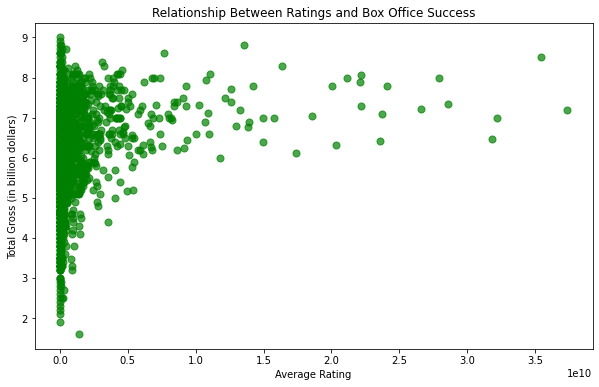

In [100]:
# Creating a new figure
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df_budgets_imdb['total_gross'], grouped_df_budgets_imdb['averagerating'], s=50, alpha=0.7, c='green')

# Adding axis labels and title
plt.xlabel('Average Rating')
plt.ylabel('Total Gross (in billion dollars)')
plt.title('Relationship Between Ratings and Box Office Success')

# Show plot
plt.show()

In [101]:
grouped_df_budgets_imdb['averagerating'].corr(grouped_df_budgets_imdb['total_gross'])

0.19994912838476026

**Observation**

In [102]:
"""The scatter plot shows a weak positive relationship between the average ratings and the total gross revenue for movies. 
While there is a postive relationship, there are still many movies with high ratings but relatively low gross revenue and vice versa.
"""

'The scatter plot shows a weak positive relationship between the average ratings and the total gross revenue for movies. \nWhile there is a postive relationship, there are still many movies with high ratings but relatively low gross revenue and vice versa.\n'

**I used another scatter plot to show the relationship between fresh reviews and gross revenue**

In [103]:
# Merging the merged_df_gross and rt_reviews_df datasets
merged_df_gross_reviews = pd.merge(merged_df_gross, rt_reviews_df, left_on='release_date', right_on='date', how='inner')
# Calculating the mean of fresh ratings for each movie
grouped_df_gross_reviews = merged_df_gross_reviews.groupby('title').agg({'total_gross': 'sum', 
                                                                         'fresh': 'mean'
                                                                        }).sort_values(by='total_gross', ascending=False)
grouped_df_gross_reviews.head(10)

,total_gross,fresh
title,,
Skyfall,5.518215e+10,0.948718
The Hobbit: An Unexpected Journey,5.280014e+10,0.600000
Black Panther,4.916060e+10,0.666667
Zootopia,4.762554e+10,0.657143
Toy Story 3,4.451639e+10,0.200000
Maleficent,3.999747e+10,0.325000
Guardians of the Galaxy,3.422609e+10,0.516129
Fast Five,2.939872e+10,0.771429
The Hobbit: The Desolation of Smaug,2.437534e+10,0.900000


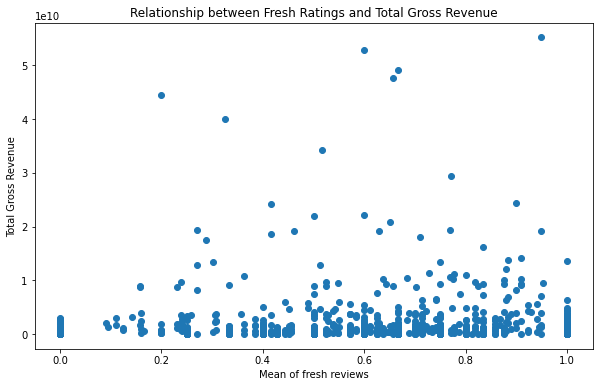

In [104]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df_gross_reviews['fresh'], grouped_df_gross_reviews['total_gross'])

# Adding axis labels and title
plt.xlabel('Mean of fresh reviews')
plt.ylabel('Total Gross Revenue')
plt.title('Relationship between Fresh Ratings and Total Gross Revenue')

# Displaying the plot
plt.show()

In [105]:
merged_df_gross_reviews['fresh'].corr(merged_df_gross_reviews['total_gross'])

0.026239609325835033

In [106]:
 """There is a weak positive correlation between fresh ratings and total gross revenue. This means that movies with higher fresh ratings tend to have slightly higher total gross revenue, but the relationship is not very strong.
 """

'There is a weak positive correlation between fresh ratings and total gross revenue. This means that movies with higher fresh ratings tend to have slightly higher total gross revenue, but the relationship is not very strong.\n'

**I also decided to create a bar graph to visualize total gross to fresh reviews**

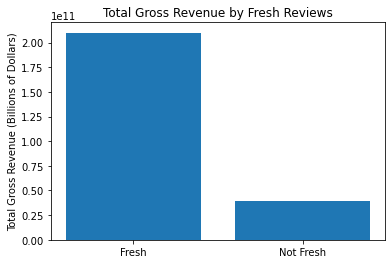

In [107]:
# Subset the data to include only movies with fresh reviews
fresh_movies = grouped_df_gross_reviews[grouped_df_gross_reviews['fresh'] == True]

# Calculate the total gross for fresh movies
fresh_gross = fresh_movies['total_gross'].sum()

# Calculate the total gross for not fresh movies
not_fresh_movies = grouped_df_gross_reviews[grouped_df_gross_reviews['fresh'] == False]
not_fresh_gross = not_fresh_movies['total_gross'].sum()

# Create a bar chart
plt.bar(['Fresh', 'Not Fresh'], [fresh_gross, not_fresh_gross])
plt.title('Total Gross Revenue by Fresh Reviews')
plt.ylabel('Total Gross Revenue (Billions of Dollars)')
plt.show()

**OBSERVATION**

In [108]:
""" Based on this bar chart visualization, movies that have fresh reviews have a higher total gross revenue than those without fresh reviews. This suggests that positive critical reception has a positive impact on the movie's box office success.
"""

" Based on this bar chart visualization, movies that have fresh reviews have a higher total gross revenue than those without fresh reviews. This suggests that positive critical reception has a positive impact on the movie's box office success.\n"

# RECOMMENDATIONS

My analysis led to four recommendations useful for the inception of Microsoft's new movie studio:

1. For Microsoft to succeed in the movie industry, they should seek to emulate the top 10 highest grossing studios through research and/or benchmarking or seek to partner with them.
2. There should be focus on producing drama, comedy, comedy|Drama and Drama|Mystery|Suspense genres as they are the most successful genres in terms of gross revenue.
3. Even though there are a few outliers in the production cost to total revenue visualization, Microsoft should invest in the film's production cost.This is because the movie industry is highly competitive and a larger budget often leads to better production which will lead to great reception and ultimately more box office success.
4. Microsoft's new movie studio should prioritize producing high-quality movies that receive positive reviews from critics and high ratings from the general audience because this will increase the likelihood of the films' financial success.

# NEXT STEPS

The movie industry is ever changing, so to stay up-to-date with the latest trends and insights, the further analysis below could be useful:

1. Analyze trends over time to provide valuable insights into which genres are growing or declining in popularity.
2. Look into the impact of streaming services in the movie industry.
3. Investigate the impact of marketing on box office success.
4. Analyze the success rate of sequels and franchises, originals and remakes.